# **Aprendizaje supervisado**
# SL07. k-Nearest Neighbor

## <font color='blue'>**k-Nearest Neighbor**</font>

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

## ¿Qué es el algoritmo k-Nearest Neighbor?

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. Como dijimos antes, es un algoritmo:

**Supervisado**: esto -brevemente- quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada “una fila” de datos.

**Basado en Instancia**: Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.


## ¿Dónde se aplica k-Nearest Neighbor?

Aunque sencillo, se utiliza en la resolución de multitud de problemas, como en sistemas de recomendación, búsqueda semántica y detección de anomalías.
## Pros y contras

Como pros tiene sobre todo que es sencillo de aprender e implementar. Tiene como contras que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features (las columnas).

## ¿Cómo funciona kNN?

1. Calcular la distancia entre el item a clasificar y el resto de items del dataset de entrenamiento.
2. Seleccionar los “k” elementos más cercanos (con menor distancia, según la función que se use)
3. Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que <<dominen>> decidirán su clasificación final.

Teniendo en cuenta el punto 3, veremos que para decidir la clase de un punto es muy importante el valor de k, pues este terminará casi por definir a qué grupo pertenecerán los puntos, sobre todo en las “fronteras” entre grupos. Por ejemplo -y a priori- yo elegiría valores impares de k para desempatar (si las features que utilizamos son pares). No será lo mismo tomar para decidir 3 valores que 13. Esto no quiere decir que necesariamente tomar más puntos implique mejorar la precisión. Lo que es seguro es que cuantos más “puntos k”, más tardará nuestro algoritmo en procesar y darnos respuesta.

Las formas más populares de “medir la cercanía” entre puntos son la distancia Euclidiana (la “de siempre”) o la Cosine Similarity (mide el ángulo de  los vectores, cuanto menores, serán similares). Recordemos que este algoritmo -y prácticamente todos en ML- funcionan mejor con varias características de las que tomemos datos (las columnas de nuestro dataset). Lo que entendemos como “distancia” en la vida real, quedará abstracto a muchas dimensiones que no podemos “visualizar” fácilmente (como por ejemplo en un mapa).


## Un ejemplo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Leemos nuestro archivo de entrada

In [2]:
from google.colab import files

uploaded = files.upload()

Saving reviews_sentiment.csv to reviews_sentiment.csv


In [3]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [4]:
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


## Visualizaciones

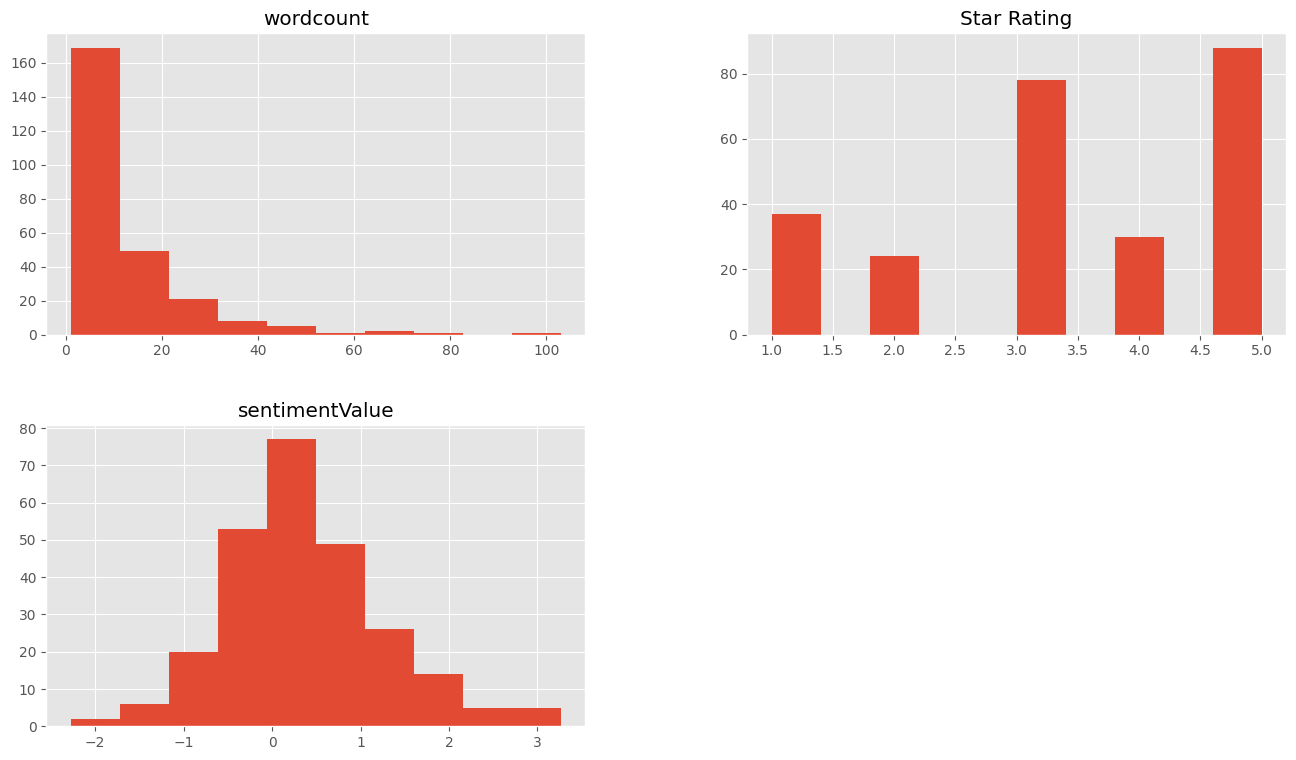

In [5]:
dataframe.hist()
plt.show()

In [6]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


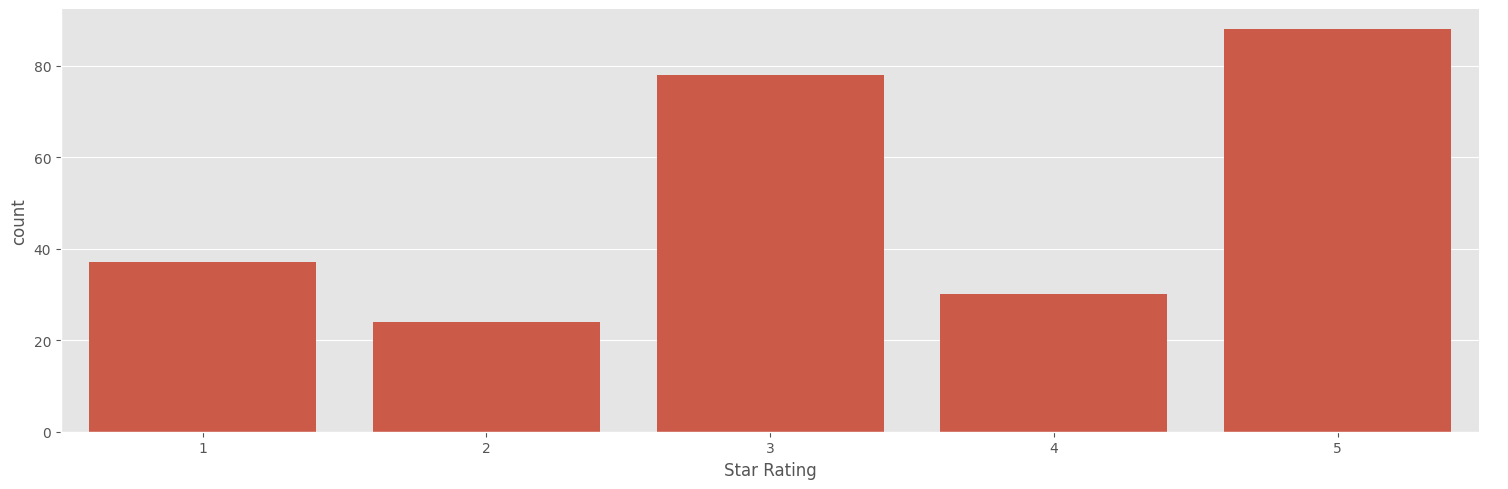

In [7]:
sb.catplot(x='Star Rating',data=dataframe,kind="count", aspect=3)
plt.show()

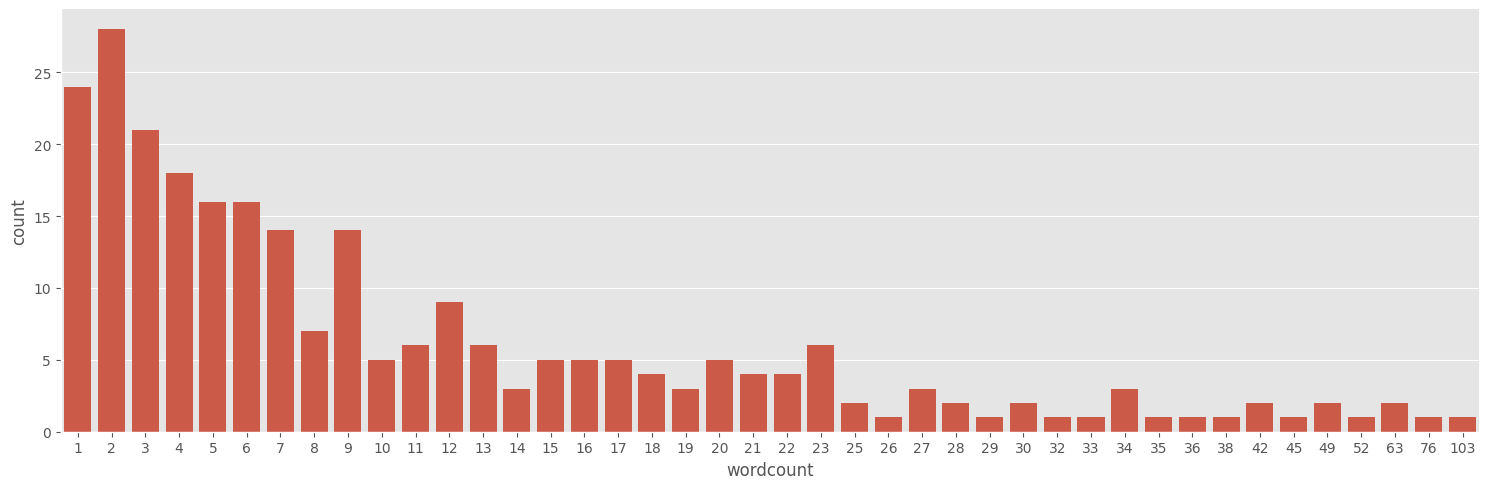

In [8]:
sb.catplot(x='wordcount',data=dataframe,kind="count", aspect=3)

plt.show()

## Preparamos el dataset

In [14]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo

In [15]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


## Resultados obtenidos

In [16]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



# Gráfica de la Clasificación Obtenida

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


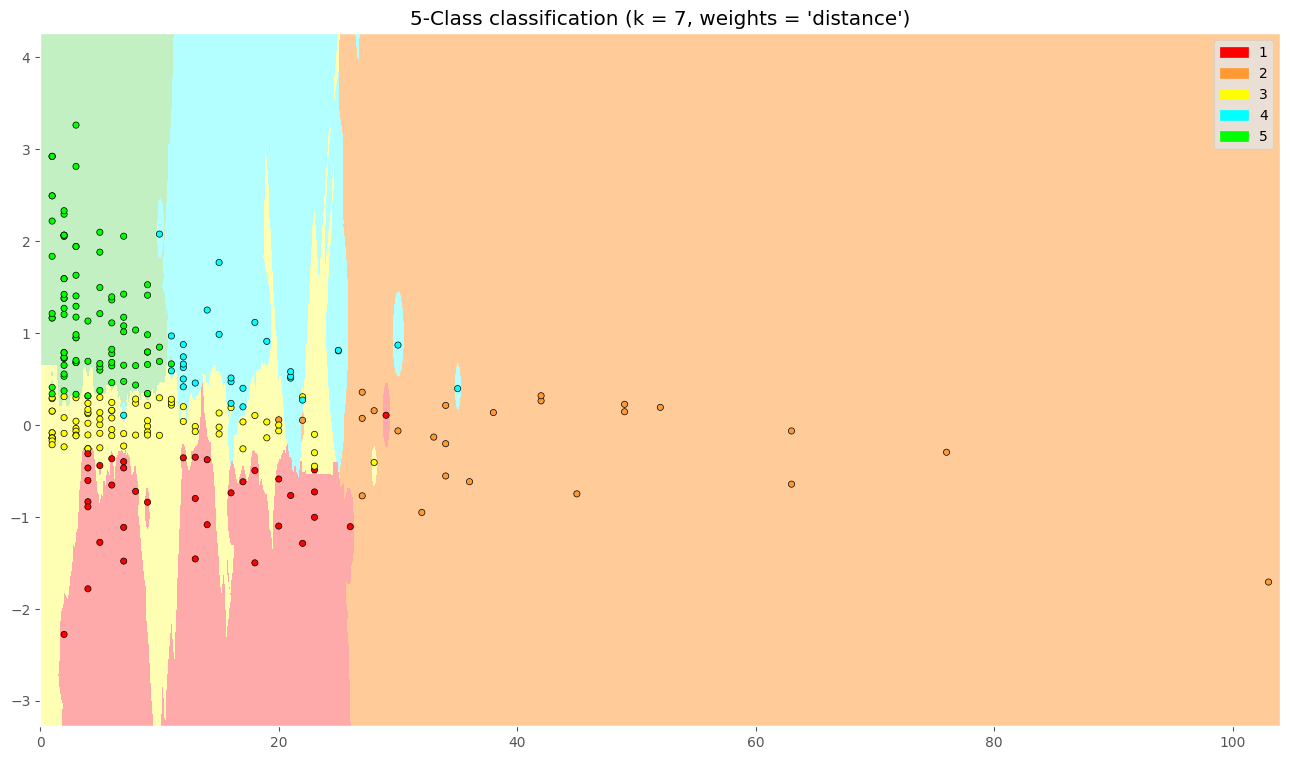

In [17]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])


plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

## Cómo obtener el mejor valor de k

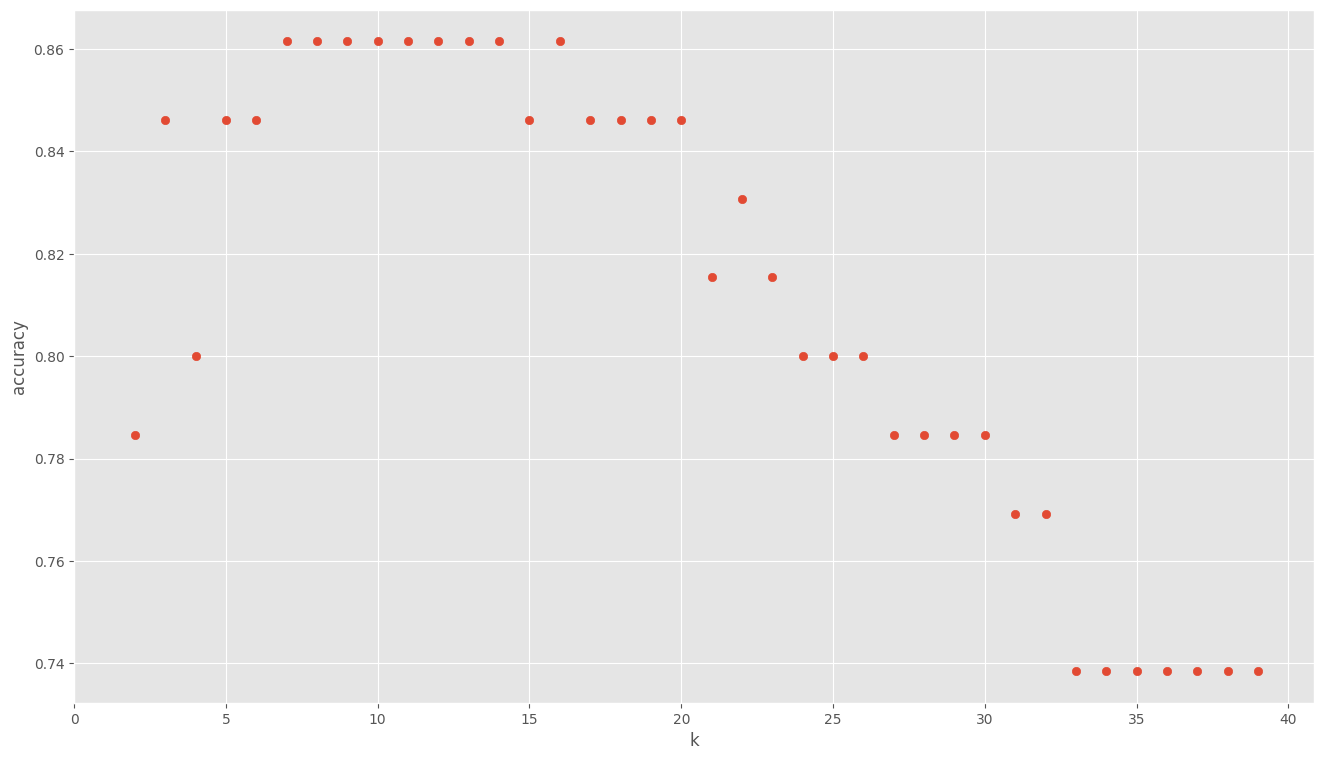

El mejor valor de k es: 7 con una exactitud de 0.8615


In [18]:
k_range = range(2, 40 )
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40])
plt.show()


best_k = k_range[scores.index(max(scores))]
print(f"El mejor valor de k es: {best_k} con una exactitud de {max(scores):.4f}")

# Predicciones

In [19]:
print(clf.predict([[5, 1.0]]))


[5]


In [20]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


## <font color='green'>Actividad 1</font>

Construiremos un modelo kNN utilizando el data set *breast cancer*. A continuación de entregan los pasos principales para construir su modelo.

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [22]:
X=data.data
y=data.target


Separe en entrenamiento y test.

In [23]:
# Tú codigo aquí ...

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Encuentre el mejor valor de k que maximice accuracy.

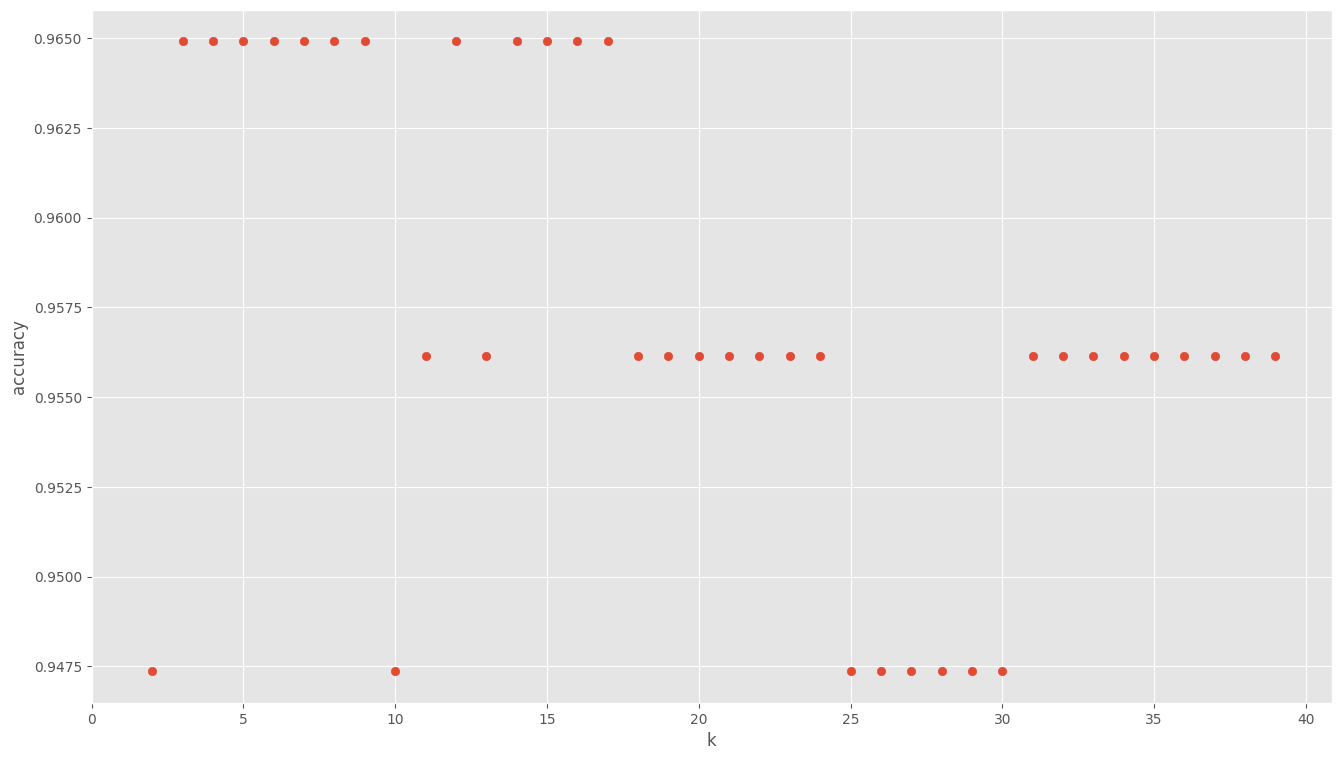

El mejor valor de k es: 3 con una exactitud de 0.9649


In [24]:
# Tú codigo aquí ...
k_range = range(2, 40 )
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30,35,40])
plt.show()


best_k = k_range[scores.index(max(scores))]
print(f"El mejor valor de k es: {best_k} con una exactitud de {max(scores):.4f}")

Genere un reporte de clasificacion (classification_report)

In [25]:
# Tú codigo aquí ...
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Realice un 5 fold crossvalidation de 20 experimentos. Reporte el promedio y desviacion estandar de accuracy.

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
import numpy as np
from sklearn.metrics import accuracy_score
import random


# Track scores for each fold
fold_scores = []

for i in range(20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0, 255))

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        # Split the data for this fold
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train a model
        knn = KNeighborsClassifier(n_neighbors = 11)
        knn.fit(X_train, y_train)

        knn.fit(X_train, y_train)

        # Make predictions and calculate accuracy
        y_pred = knn.predict(X_test)
        score = accuracy_score(y_test, y_pred)

        # Store the score
        fold_scores.append(score)

        print(f"Fold {fold}: Accuracy = {score:.4f}")



# Tú codigo aquí ...




Fold 1: Accuracy = 0.9474
Fold 2: Accuracy = 0.9298
Fold 3: Accuracy = 0.9474
Fold 4: Accuracy = 0.9211
Fold 5: Accuracy = 0.9292
Fold 1: Accuracy = 0.9123
Fold 2: Accuracy = 0.9386
Fold 3: Accuracy = 0.9561
Fold 4: Accuracy = 0.9561
Fold 5: Accuracy = 0.9115
Fold 1: Accuracy = 0.9474
Fold 2: Accuracy = 0.9298
Fold 3: Accuracy = 0.9123
Fold 4: Accuracy = 0.9386
Fold 5: Accuracy = 0.9204
Fold 1: Accuracy = 0.8860
Fold 2: Accuracy = 0.9561
Fold 3: Accuracy = 0.9386
Fold 4: Accuracy = 0.9298
Fold 5: Accuracy = 0.9558
Fold 1: Accuracy = 0.9123
Fold 2: Accuracy = 0.9561
Fold 3: Accuracy = 0.9298
Fold 4: Accuracy = 0.9386
Fold 5: Accuracy = 0.9292
Fold 1: Accuracy = 0.9649
Fold 2: Accuracy = 0.9649
Fold 3: Accuracy = 0.8772
Fold 4: Accuracy = 0.9386
Fold 5: Accuracy = 0.9469
Fold 1: Accuracy = 0.9386
Fold 2: Accuracy = 0.9561
Fold 3: Accuracy = 0.8421
Fold 4: Accuracy = 0.9474
Fold 5: Accuracy = 0.9823
Fold 1: Accuracy = 0.9737
Fold 2: Accuracy = 0.9211
Fold 3: Accuracy = 0.9123
Fold 4: Accu

<font color='green'>Fin Actividad 1</font>

In [27]:
accuracy = pd.DataFrame(fold_scores)

In [28]:
accuracy.describe()


,0
count,100.000000
mean,0.933132
std,0.022033
min,0.842105
25%,0.921053
50%,0.929825
75%,0.947368
max,0.982301
